<a href="https://colab.research.google.com/github/KavindaDulhan/Image_Proccessing/blob/master/image_processing_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow - Keras CNN Examples

## (i) Helper Functions

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def show_image_examples(class_names, features, labels):
    """
    Show Samples Images in the Dataset
    """
    print('Number of Classes =', len(class_names))
    num_classes = len(class_names)
    fig = plt.figure(figsize=(8, 3))
    for i in range(num_classes):
        ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
        idx = np.where(labels[:] == i)[0]
        features_idx = features[idx, ::]
        img_num = np.random.randint(features_idx.shape[0])
        im = features_idx[img_num, ::]
        ax.set_title(class_names[i])
        plt.imshow(im)
    plt.show()

def plot_model_history(model_history):
    """
    Plot Training History of the Trained Model
    """
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    
    # Summarize history for Accuracy
    axs[0].plot(range(1,len(model_history.history['sparse_categorical_accuracy'])+1), 
                            model_history.history['sparse_categorical_accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_sparse_categorical_accuracy'])+1), 
                            model_history.history['val_sparse_categorical_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['sparse_categorical_accuracy'])+1),
                                  len(model_history.history['sparse_categorical_accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    
    # Summarize History for Loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),
                            model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1), 
                            model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),
                                  len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

## (ii) Import Libraries

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

print("TensorFlow Version =", tf.__version__)

TensorFlow Version = 1.15.0


# _MNIST DATASET_

## 1) Import Dataset

Number of Classes = 10


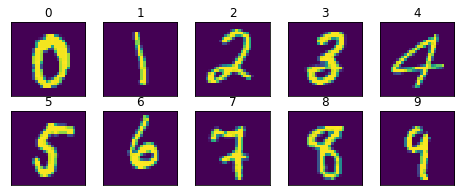

In [13]:
from tensorflow.keras.datasets import mnist

# Input Image Dimensions
img_rows, img_cols = 28, 28

# The Data, Split Between Train and Test Sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Showing a Few Examples
show_image_examples(class_names, x_train, y_train)

x_train, x_test = x_train / 255.0, x_test / 255.0

## 2) Fully Connected Model 

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 4s 68us/sample - loss: 0.3140 - sparse_categorical_accuracy: 0.9075 - val_loss: 0.1274 - val_sparse_categorical_accuracy: 0.9675
Epoch 2/10
54000/54000 [==============================] - 4s 66us/sample - loss: 0.1538 - sparse_categorical_accuracy: 0.9556 - val_loss: 0.0934 - val_sparse_categorical_accuracy: 0.9737
Epoch 3/10
54000/54000 [==============================] - 4s 65us/sample - loss: 0.1140 - sparse_categorical_accuracy: 0.9656 - val_loss: 0.0848 - val_sparse_categorical_accuracy: 0.9743
Epoch 4/10
54000/54000 [==============================] - 4s 67us/sample - loss: 0.0944 - sparse_categorical_accuracy: 0.9707 - val_loss: 0.0749 - val_sparse_categorical_accuracy: 0.9770
Epoch 5/10
54000/54000 [==============================] - 4s 65us/sample - loss: 0.0793 - sparse_categorical_accuracy: 0.9749 - val_loss: 0.0743 - val_sparse_categorical_accuracy: 0.9773
Epoch 6/10
54000

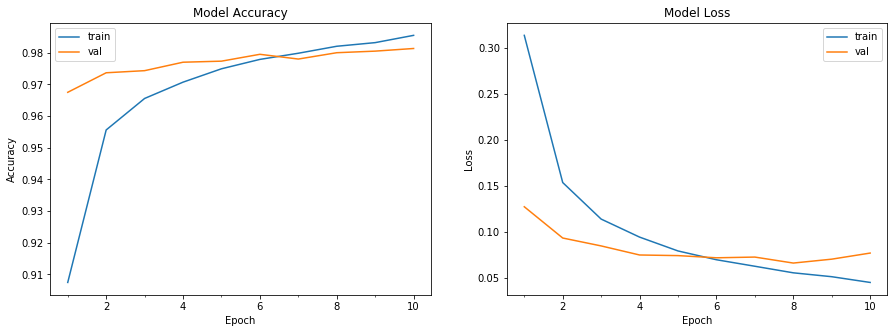

In [14]:
model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(10, activation='softmax')])

model.compile(optimizer= keras.optimizers.Adam(),
              loss= keras.losses.SparseCategoricalCrossentropy(),
              metrics= [keras.metrics.SparseCategoricalAccuracy()])

history = model.fit(x_train, y_train, epochs= 10, validation_split= 0.1)

score = model.evaluate(x_test,  y_test, verbose= 2)

model.summary()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plot_model_history(history)

## 3) LeNet 5 - CNN

In [0]:
# Reshape the Training and test set
X_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
X_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Padding the Images by 2 Pixels Since Input Size of Images Should be 32x32
X_train = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

# Standardization
mean = X_train.mean().astype(np.float32)
std = X_train.std().astype(np.float32)

X_train = (X_train - mean)/(std)
X_test = (X_test - mean)/(std)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 5s 97us/sample - loss: 0.2413 - sparse_categorical_accuracy: 0.9246 - val_loss: 0.0701 - val_sparse_categorical_accuracy: 0.9778
Epoch 2/10
54000/54000 [==============================] - 5s 93us/sample - loss: 0.0884 - sparse_categorical_accuracy: 0.9739 - val_loss: 0.0558 - val_sparse_categorical_accuracy: 0.9825
Epoch 3/10
54000/54000 [==============================] - 5s 95us/sample - loss: 0.0675 - sparse_categorical_accuracy: 0.9798 - val_loss: 0.0456 - val_sparse_categorical_accuracy: 0.9880
Epoch 4/10
54000/54000 [==============================] - 5s 97us/sample - loss: 0.0540 - sparse_categorical_accuracy: 0.9842 - val_loss: 0.0423 - val_sparse_categorical_accuracy: 0.9890
Epoch 5/10
54000/54000 [==============================] - 5s 96us/sample - loss: 0.0459 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.0447 - val_sparse_categorical_accuracy: 0.9880
Epoch 6/10
54000

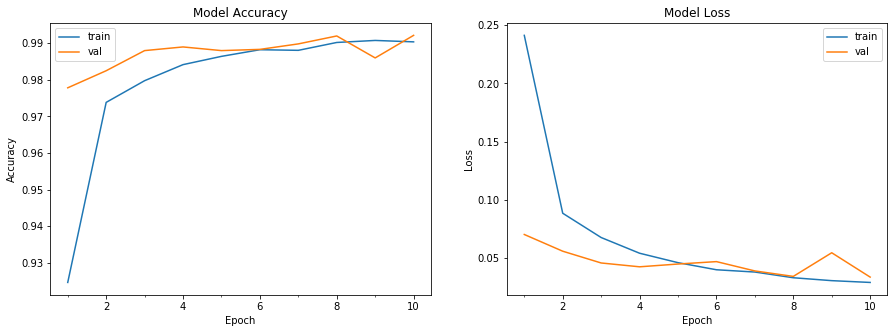

In [16]:
def LeNet5_model(ch):
    Model = Sequential()

    # Layer 1
    # -------
    Model.add(Conv2D(filters = 6, kernel_size = 5, strides = 1, activation = 'relu', input_shape = (32,32,ch))) # Conv Layer 1
    Model.add(MaxPooling2D(pool_size = 2, strides = 2)) # Pooling Layer 1

    # Layer 2
    # -------
    Model.add(Conv2D(filters = 10, kernel_size = 5, strides = 1, activation = 'relu', input_shape = (14,14,6))) # Conv Layer 2
    Model.add(MaxPooling2D(pool_size = 2, strides = 2)) # Pooling Layer 2

    # Layer 3
    # -------
    Model.add(Flatten()) # Flatten
    Model.add(Dense(units = 120, activation = 'relu')) # Fully Connected Layer 1
    Model.add(Dropout(0.2)) # Dropout layer 1

    # Layer 4
    # -------
    Model.add(Dense(units = 84, activation = 'relu')) # Fully Connected Layer 2
    Model.add(Dropout(0.2)) # Dropout layer 2

    # Layer 5
    # -------
    Model.add(Dense(units = 10, activation = 'softmax')) # Output Layer
    return Model

LeNet = LeNet5_model(1)

LeNet.compile(optimizer=keras.optimizers.Adam(), 
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

history = LeNet.fit(X_train, y_train, epochs=10, validation_split=0.1)

score = LeNet.evaluate(X_test, y_test, verbose=2)

LeNet.summary()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plot_model_history(history)

# _CIFAR-10 DATASET_

Number of Classes = 10


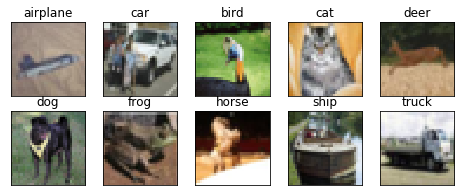

In [17]:
from tensorflow.keras.datasets import cifar10

# Input Image Dimensions
img_rows, img_cols = 28, 28

# The Data, Split Between Train and Test Sets
(X_train_CIFAR, Y_train_CIFAR), (X_test_CIFAR, Y_test_CIFAR) = cifar10.load_data()

class_names = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Showing a Few Examples
show_image_examples(class_names, X_train_CIFAR, Y_train_CIFAR)

X_train_CIFAR, X_test_CIFAR = X_train_CIFAR / 255.0, X_test_CIFAR / 255.0

## 1) Import Dataset

In [0]:
# Standardization
mean = X_train_CIFAR.mean().astype(np.float32)
std = X_train_CIFAR.std().astype(np.float32)

X_train_CIFAR = (X_train_CIFAR - mean)/(std)
X_test_CIFAR = (X_test_CIFAR - mean)/(std)

## 2) LeNet 5 - CNN

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 5s 118us/sample - loss: 1.6893 - sparse_categorical_accuracy: 0.3777 - val_loss: 1.4093 - val_sparse_categorical_accuracy: 0.4820
Epoch 2/10
45000/45000 [==============================] - 5s 115us/sample - loss: 1.4238 - sparse_categorical_accuracy: 0.4837 - val_loss: 1.3265 - val_sparse_categorical_accuracy: 0.5176
Epoch 3/10
45000/45000 [==============================] - 5s 115us/sample - loss: 1.3283 - sparse_categorical_accuracy: 0.5251 - val_loss: 1.2514 - val_sparse_categorical_accuracy: 0.5526
Epoch 4/10
45000/45000 [==============================] - 5s 117us/sample - loss: 1.2646 - sparse_categorical_accuracy: 0.5462 - val_loss: 1.2218 - val_sparse_categorical_accuracy: 0.5652
Epoch 5/10
45000/45000 [==============================] - 5s 117us/sample - loss: 1.2152 - sparse_categorical_accuracy: 0.5662 - val_loss: 1.2217 - val_sparse_categorical_accuracy: 0.5622
Epoch 6/10


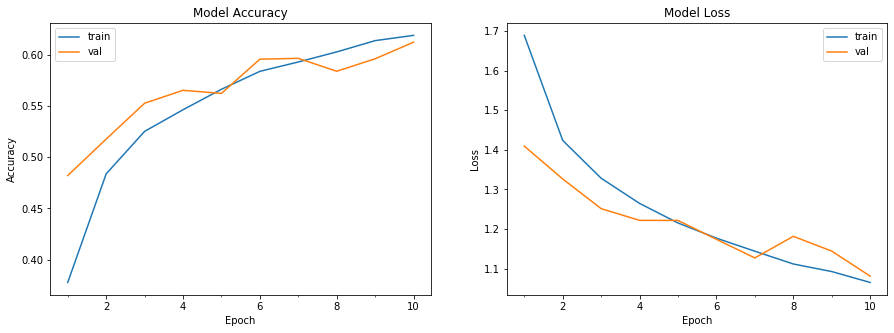

In [19]:
LeNet = LeNet5_model(3)

LeNet.compile(optimizer=keras.optimizers.Adam(), 
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

history = LeNet.fit(X_train_CIFAR, Y_train_CIFAR, epochs=10, validation_split=0.1)

score = LeNet.evaluate(X_test_CIFAR, Y_test_CIFAR, verbose=2)

LeNet.summary()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plot_model_history(history)